In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from mpl_toolkits.axisartist.axislines import AxesZero


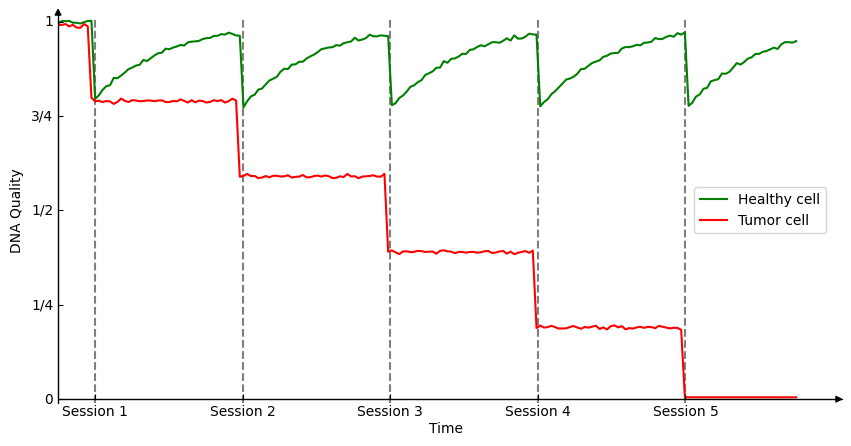

In [2]:
N = 200
RAND = 0.003
NB = 5
TMAX = 2 * NB
time = np.linspace(0, TMAX, N)
def irradiation_normal(x, t, factor=0.4):
    return -factor*(np.exp(-x+t).clip(0,1) + np.sign(x-t)*0.5 - 0.5)

def irradiation_cancer(x, t, factor=0.4):
    return -factor*(np.sign(x-t)*0.5 - 0.5)

irradiation_factors = [0.4, 0.3, 0.2, 0.1]
irradiation_factors = [0.2] * NB
irradiation_times = [0.5 + 2*i for i in range(NB)]
normal_cell = 1 + RAND*np.random.randn(N)
cancer_cell = -0.01 + RAND*np.random.randn(N)
for t, factor in zip(irradiation_times, irradiation_factors):
    normal_cell += irradiation_normal(time, t, factor)
    cancer_cell += irradiation_cancer(time, t-0.05, factor)
normal_cell = normal_cell.clip(0.005, 1.005)
cancer_cell = cancer_cell.clip(0.005, 1.005)

# plot configuration
plt.figure(figsize=(10,5)).add_subplot(axes_class=AxesZero)
# render axis lines
plt.gca().axis["xzero"].set_visible(True)
plt.gca().axis["yzero"].set_visible(True)
# arrow style
plt.gca().axis["xzero"].set_axisline_style("-|>")
plt.gca().axis["yzero"].set_axisline_style("-|>")
# do not draw frame
plt.gca().axis["top"].set_visible(False)
plt.gca().axis["bottom"].set_visible(False)
plt.gca().axis["right"].set_visible(False)
plt.gca().axis["left"].set_visible(False)

# plot irradiation times as vertical lines
for t in irradiation_times:
    plt.gca().axvline(t, color='k', linestyle='--', alpha=0.5)
# plot DNA quality
plt.plot(time, normal_cell, color='green', label='Healthy cell')
plt.plot(time, cancer_cell, color='red', label='Tumor cell')
plt.legend(loc='center right')
plt.xlim(0, None)
plt.xlabel('Time')
plt.xticks(irradiation_times, [f'Session {i+1}' for i in range(len(irradiation_times))])
plt.ylim(-0.01, 1.01)
plt.ylabel('DNA Quality')
plt.yticks([0, 0.25, 0.5, 0.75, 1], ['0', '1/4', '1/2', '3/4', '1'])
# plt.title('DNA Quality over Time')

# plt.savefig('_dna_quality.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()